In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [39]:
ts = pd.read_csv('data/mean-daily-temperature.csv', 
                parse_dates = ['date'], 
                index_col = 'date', 
                infer_datetime_format = True                )
ts.columns = ['temp']
ts.head()



,temp
date,
1988-01-01,23.0
1988-01-02,20.5
1988-01-03,22.0
1988-01-04,30.5
1988-01-05,31.0


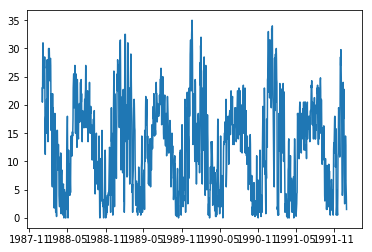

In [40]:
plt.plot(ts.temp)

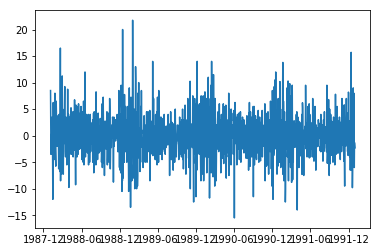

In [44]:
ts['difference'] = ts.temp[1:] - ts.temp.shift(1)
ts.dropna(inplace=True)

plt.plot(ts.difference)

In [45]:
from sklearn.metrics import mean_squared_error as mse

# Prediction of the difference
ts['predict_naive'] =ts.difference.shift(1)
ts.dropna(inplace=True)
mse(ts.predict_naive, ts.difference)


30.360830473575838

In [20]:
type(ts.difference)
?ts.difference.rolling

16.308861923461922

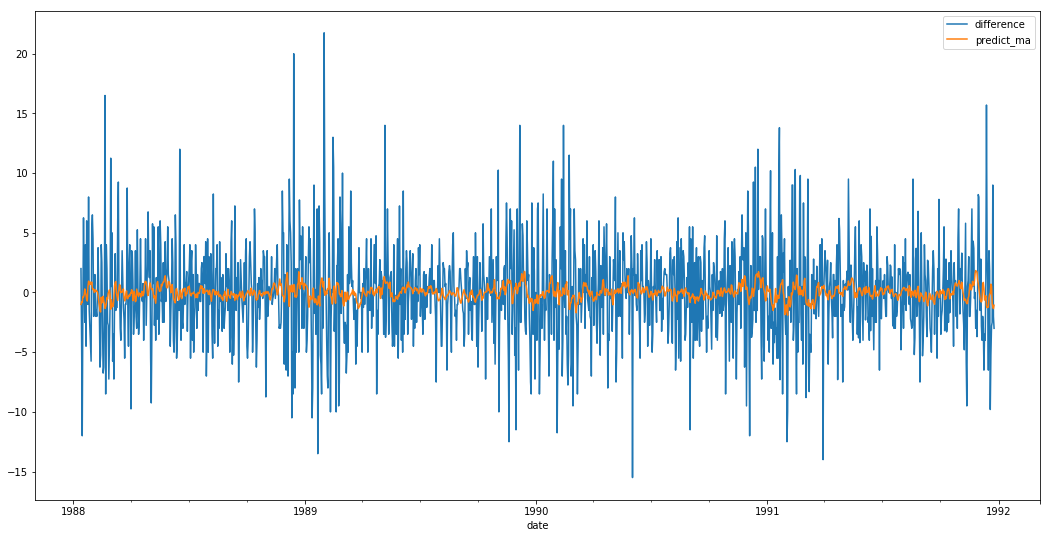

In [46]:
# Predict with Moveing Average
ts['predict_ma'] = ts.difference.rolling(window = 15, center= True).mean().shift(1)
ts.dropna(inplace=True)
ts[['difference', 'predict_ma']].plot(figsize=(18,9))
mse(ts.predict_ma, ts.difference)
    


14.270278254820623

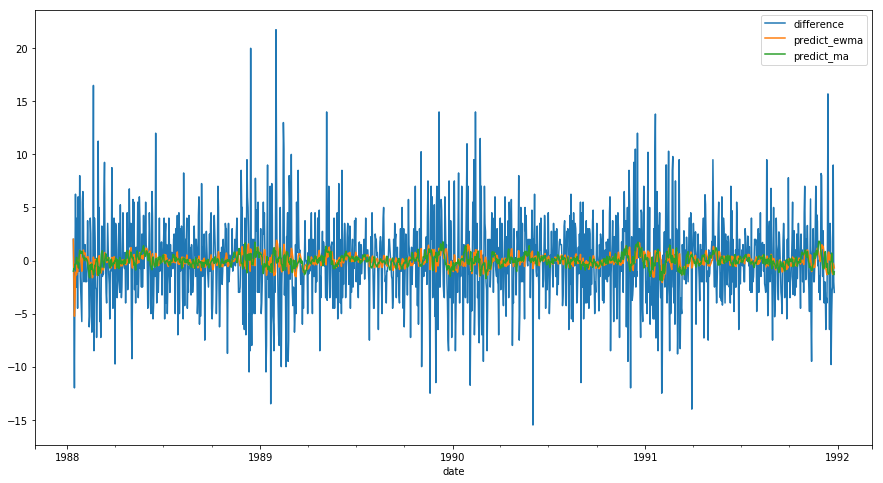

In [47]:
ts['predict_ewma'] = ts.difference.ewm(alpha = 0.1).mean()
ts[['difference', 'predict_ewma','predict_ma']].plot(figsize=(15,8))
mse(ts.predict_ewma, ts.difference)

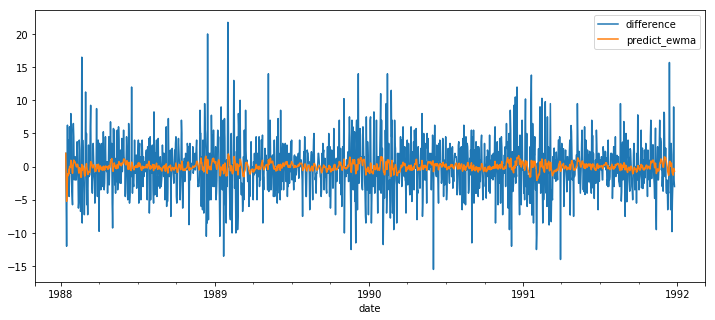

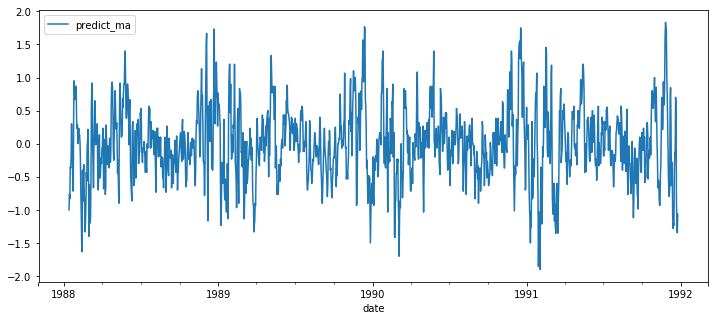

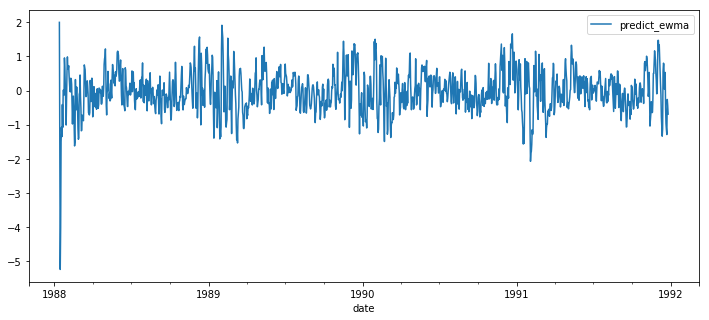

In [48]:
ts[['difference','predict_ewma']].plot(figsize=(12,5))
ts[['predict_ma']].plot(figsize=(12,5))
ts[['predict_ewma']].plot(figsize=(12,5))
